In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Linear Regression Before outliers handling

In [2]:
df=sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

* No null values in the DataFrame

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


### plot the columns to check which column as good co-relation with target column

<AxesSubplot: xlabel='smoker', ylabel='tip'>

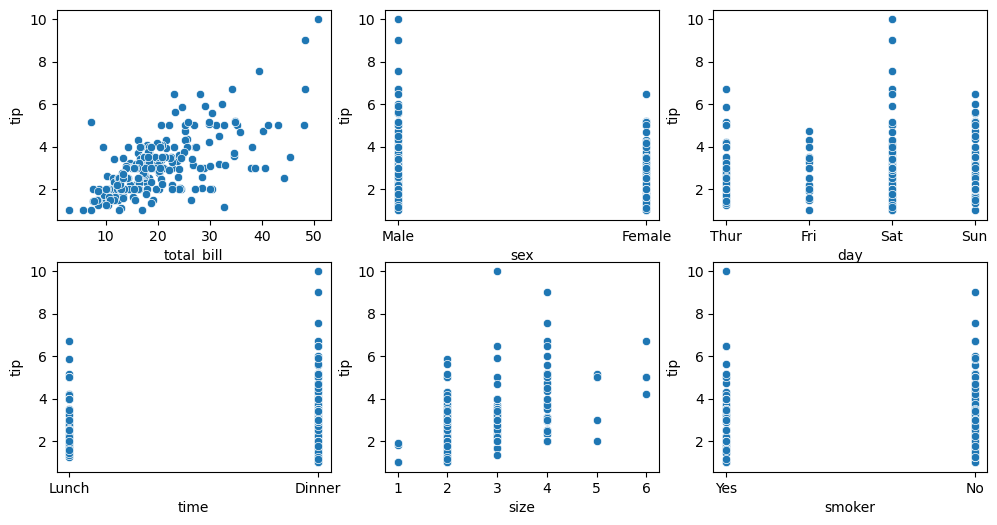

In [5]:
plt.figure(figsize=(12,6))
plt.subplot(2,3,1)
sns.scatterplot(x=df["total_bill"],y=df["tip"])

plt.subplot(2,3,2)
sns.scatterplot(x=df["sex"],y=df["tip"])

plt.subplot(2,3,3)
sns.scatterplot(x=df["day"],y=df["tip"])


plt.subplot(2,3,4)
sns.scatterplot(x=df["time"],y=df["tip"])


plt.subplot(2,3,5)
sns.scatterplot(x=df["size"],y=df["tip"])


plt.subplot(2,3,6)
sns.scatterplot(x=df["smoker"],y=df["tip"])

* from above plots we can see that `total_bill`,`sex`,`size`,`time`,`day` as good co-relation with target column
* smoker has less coo-relation our target column
* so we take `total_bill`,`sex`,`size`,`time`,`day` as predicating variables

* separting the data as `prediting coulmn` and `target column`

In [6]:
X=df[["total_bill","sex","size","time","day","smoker"]]
y=df["tip"]

* spliting the data into train and test 

In [7]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest=train_test_split(X,y,
                                          test_size=0.23,random_state=23)

In [8]:
xTrain.shape,xTest.shape,len(yTrain),len(yTest)

((187, 6), (57, 6), 187, 57)

* separate the  --> continuous
                -->categorical
                      ---> Ordinal data
                      ---> Norminal data 

In [9]:
contCol=["total_bill"]
ordcatcol=["size"]
norcatcol=["sex","time","day","smoker"]

#### importing neccessary libraries for pipeline and column transformer

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

### creating pipeline

In [11]:
from sklearn.preprocessing import PowerTransformer,RobustScaler
ContPipeline=Pipeline(steps=[
    ("YeoJohnsonTransformer",PowerTransformer()),
    ("standardscalar",RobustScaler())
])

In [12]:
from sklearn.preprocessing import OrdinalEncoder
OrdCatPipeline=Pipeline(steps=[
    ("Ordcatencode",OrdinalEncoder(categories=[[1,2,3,4,5,6]]))
])

In [13]:
from sklearn.preprocessing import OneHotEncoder
NorCatPipeline=Pipeline(steps=[
    ("norcatencode",OneHotEncoder(sparse=False,handle_unknown="ignore"))
])

In [14]:
#  To Display Pipeline
from sklearn import set_config
set_config(display='diagram')


In [15]:
display(ContPipeline)

Pipeline(steps=[('YeoJohnsonTransformer', PowerTransformer()),
                ('standardscalar', RobustScaler())])

### creating column Transformer using above pipeline

In [16]:
ColumnTrans=ColumnTransformer(transformers=[
    ("ContPipeline",ContPipeline,contCol),
    ("OrdCatPipeline",OrdCatPipeline,ordcatcol),
    ("NorCatPipeline",NorCatPipeline,norcatcol)
],
remainder = 'passthrough')

## creating a Linear Regression model

In [17]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LRpipeline=Pipeline(steps=[
    ("processer",ColumnTrans),
    ("knnRmodel",LR)
])

In [18]:
LRpipeline.fit(xTrain,yTrain)

Pipeline(steps=[('processer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ContPipeline',
                                                  Pipeline(steps=[('YeoJohnsonTransformer',
                                                                   PowerTransformer()),
                                                                  ('standardscalar',
                                                                   RobustScaler())]),
                                                  ['total_bill']),
                                                 ('OrdCatPipeline',
                                                  Pipeline(steps=[('Ordcatencode',
                                                                   OrdinalEncoder(categories=[[1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6]]))]),
                                                  ['size']),
                                                 ('NorCatPipeline',
                                                  Pipeline(steps=[('norcatencode',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['sex', 'time', 'day',
                                                   'smoker'])])),
                ('knnRmodel', LinearRegression())])

In [19]:
yTrainPred=LRpipeline.predict(xTrain)
yTestpred=LRpipeline.predict(xTest)

In [20]:
from sklearn.metrics import mean_squared_error as mse
mse(yTrain,yTrainPred),mse(yTest,yTestpred)

(1.1308776024877825, 0.9438361352979928)

# Linear Regression after Handling the outliers

In [21]:
df=sns.load_dataset("tips")
df=df.drop_duplicates()

In [22]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## checking for outliers

<AxesSubplot: >

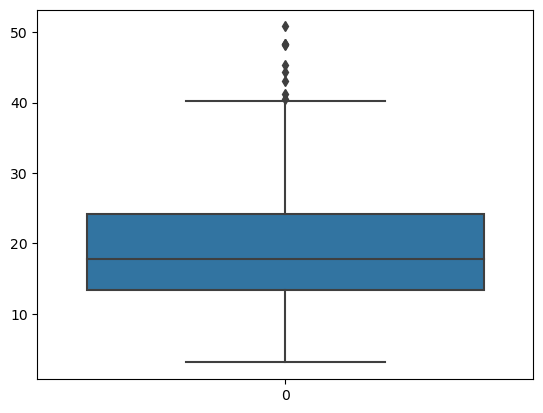

In [23]:
sns.boxplot(df["total_bill"])

* There are some outliers in total_bill

# Handling the outliers with IQR

In [24]:
Q1=df["total_bill"].quantile(0.25)
Q3 =df["total_bill"].quantile(0.75)
IQR = Q3-Q1
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)
med=df["total_bill"].median()

In [25]:
low,up,med

(-2.8124999999999964, 40.36749999999999, 17.81)

In [26]:
# checking for outliers
df[(df["total_bill"]<low) | (df["total_bill"]>up)]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


In [27]:
df["total_bill"] = df["total_bill"].apply(lambda x : low if x < low  else  up  if x > up else x)

<AxesSubplot: >

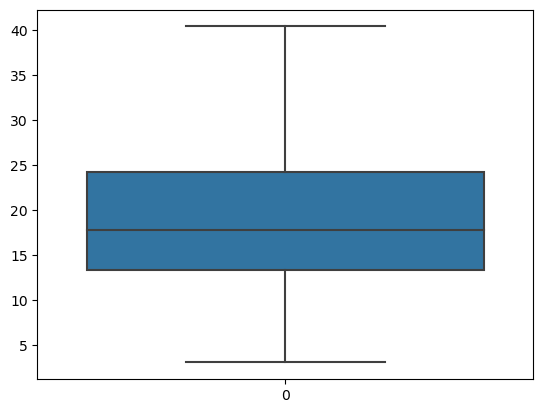

In [28]:
sns.boxplot([df["total_bill"]])

In [29]:
Q1=df["total_bill"].quantile(0.25)
Q3 =df["total_bill"].quantile(0.75)
IQR = Q3-Q1
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)
med=df["total_bill"].median()
low,up,med

(-2.8124999999999964, 40.36749999999999, 17.81)

In [30]:
df[(df["total_bill"]<low) | (df["total_bill"]>up)]

,total_bill,tip,sex,smoker,day,time,size


* There is no outliers

In [31]:
X=df[["total_bill","sex","size","time","day","smoker"]]
y=df["tip"]

# Spliting the data into train and test

In [32]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest=train_test_split(X,y,
                                          test_size=0.23,
                                          random_state=23)

In [33]:
xTrain.shape,xTest.shape,len(yTrain),len(yTest)

((187, 6), (56, 6), 187, 56)

In [34]:
contCol=["total_bill"]
ordcatcol=["size"]
norcatcol=["sex","time","day","smoker"]

# Data Preprocessing

In [35]:
from sklearn.preprocessing import PowerTransformer,RobustScaler
ContPipeline=Pipeline(steps=[
    ("YeoJohnsonTransformer",RobustScaler()),
    ("standardscalar",PowerTransformer())
])

In [36]:
from sklearn.preprocessing import OrdinalEncoder
OrdCatPipeline=Pipeline(steps=[
    ("Ordcatencode",OrdinalEncoder(categories=[[1,2,3,4,5,6]]))
])

In [37]:
from sklearn.preprocessing import OneHotEncoder
NorCatPipeline=Pipeline(steps=[
    ("norcatencode",OneHotEncoder(sparse=False,handle_unknown="ignore"))
])

In [38]:
ColumnTrans=ColumnTransformer(transformers=[
    ("ContPipeline",ContPipeline,contCol),
    ("OrdCatPipeline",OrdCatPipeline,ordcatcol),
    ("NorCatPipeline",NorCatPipeline,norcatcol)
],
remainder = 'passthrough')

# Create the Linear Regression Model 

In [39]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LRpipeline=Pipeline(steps=[
    ("processer",ColumnTrans),
    ("knnRmodel",LR)
])

In [40]:
LRpipeline.fit(xTrain,yTrain)

Pipeline(steps=[('processer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ContPipeline',
                                                  Pipeline(steps=[('YeoJohnsonTransformer',
                                                                   RobustScaler()),
                                                                  ('standardscalar',
                                                                   PowerTransformer())]),
                                                  ['total_bill']),
                                                 ('OrdCatPipeline',
                                                  Pipeline(steps=[('Ordcatencode',
                                                                   OrdinalEncoder(categories=[[1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6]]))]),
                                                  ['size']),
                                                 ('NorCatPipeline',
                                                  Pipeline(steps=[('norcatencode',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['sex', 'time', 'day',
                                                   'smoker'])])),
                ('knnRmodel', LinearRegression())])

In [41]:
yTrainPred=LRpipeline.predict(xTrain)
yTestpred=LRpipeline.predict(xTest)

In [42]:
from sklearn.metrics import mean_squared_error as mse
mse(yTrain,yTrainPred),mse(yTest,yTestpred)

(1.1598796490415535, 0.8536901580869598)